In [1]:
pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 KB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
dataset = datasets.load_iris()
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
seed = 123
X_train, X_test, y_train, y_test = train_test_split(
    dataset.data,
    dataset.target,
    test_size = 0.2,
    random_state = seed
)
X_train.shape

(120, 4)

In [6]:
y_train.shape

(120,)

In [7]:
X_test.shape

(30, 4)

In [8]:
y_test.shape

(30,)

In [15]:
# Premier Run
from sklearn.linear_model import LogisticRegression
import mlflow

mlflow.set_experiment("Reg_Logistic_Models")
mlflow.sklearn.autolog()

with mlflow.start_run(run_name = 'reg_logistic_defaut'):
  clf = LogisticRegression()
  clf.fit(X_train, y_train)

2023/01/18 09:30:35 INFO mlflow.tracking.fluent: Experiment with name 'Reg_Logistic_Models' does not exist. Creating a new experiment.
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Deuxième Run
with mlflow.start_run(run_name = 'reg_logistic_max_iter200'):
  clf2 = LogisticRegression(max_iter = 200)
  clf2.fit(X_train, y_train)

In [22]:
# Premier run
mlflow.set_experiment("Decision_Tree_Models")
mlflow.sklearn.autolog()

from sklearn.tree import DecisionTreeClassifier
with mlflow.start_run(run_name='decision_tree_defaut'):
  dt = DecisionTreeClassifier(random_state = seed)
  dt.fit(X_train, y_train)

2023/01/18 10:00:38 INFO mlflow.tracking.fluent: Experiment with name 'Decision_Tree_Models' does not exist. Creating a new experiment.


In [24]:
# Deuxième run
with mlflow.start_run(run_name='decision_tree_max_depth3'):
  dt2 = DecisionTreeClassifier(random_state = seed, max_depth=3)
  dt2.fit(X_train, y_train)

In [17]:
pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=cd0d077a19b88b22fc105355415f0de1d61ea1bcfd687f26418e49bf0e70e4e0
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok


In [25]:
from pyngrok import ngrok

# terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optionnal)
# Get your authtoken from https://dashboard.ngrok.com/get-started/your-authtoken
NGROK_AUTH_TOKEN = "2KUcNLEZkaUJnxbSKKkDXLnprFX_6JH8Re6QnGXJUU2VGzpgC"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for https://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLFlow Tracking UI:", ngrok_tunnel.public_url)

MLFlow Tracking UI: https://6329-35-247-68-115.ngrok.io


In [26]:
!mlflow ui

[2023-01-18 10:02:40 +0000] [15595] [INFO] Starting gunicorn 20.1.0
[2023-01-18 10:02:40 +0000] [15595] [INFO] Listening at: http://127.0.0.1:5000 (15595)
[2023-01-18 10:02:40 +0000] [15595] [INFO] Using worker: sync
[2023-01-18 10:02:40 +0000] [15599] [INFO] Booting worker with pid: 15599
[2023-01-18 10:02:40 +0000] [15604] [INFO] Booting worker with pid: 15604
[2023-01-18 10:02:40 +0000] [15605] [INFO] Booting worker with pid: 15605
[2023-01-18 10:02:40 +0000] [15606] [INFO] Booting worker with pid: 15606
[2023-01-18 10:08:20 +0000] [15595] [INFO] Handling signal: int

Aborted!
[2023-01-18 10:08:20 +0000] [15604] [INFO] Worker exiting (pid: 15604)
[2023-01-18 10:08:20 +0000] [15599] [INFO] Worker exiting (pid: 15599)
[2023-01-18 10:08:20 +0000] [15605] [INFO] Worker exiting (pid: 15605)
[2023-01-18 10:08:20 +0000] [15606] [INFO] Worker exiting (pid: 15606)
[2023-01-18 10:08:21 +0000] [15595] [INFO] Shutting down: Master


In [20]:
import numpy as np
new_data = np.array([[5.5, 3.8, 4.6, 1.9]])
new_data

array([[5.5, 3.8, 4.6, 1.9]])

In [27]:
import mlflow
logged_model = 'runs:/6d80da8230b24b059f9cf1f2ef9b3207/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
prediction = loaded_model.predict(pd.DataFrame(new_data))
prediction

array([1])

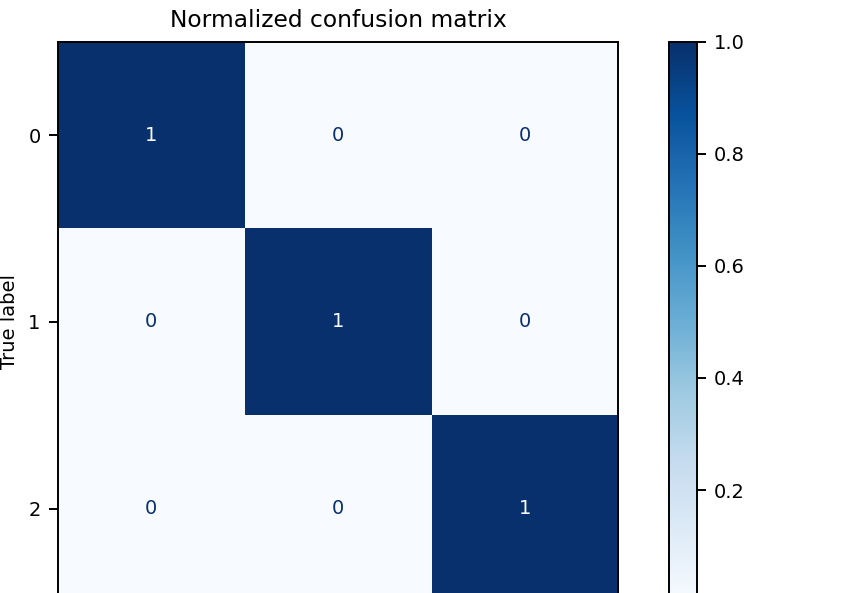